# Visualization

In [1]:
import os
from skyfield.api import load
from ground_path import ground_path
import pandas as pd
from plotting import plot_ground_path
import cartopy
from matplotlib import gridspec
import matplotlib.pyplot as plt

### Load data

In [2]:
resource_url = 'http://celestrak.com/NORAD/elements/resource.txt'

fname = 'tle.txt'
if os.path.isfile(fname):
    os.remove(fname)

satellites = load.tle(resource_url, filename=fname, reload=True)
satellite = satellites['HODOYOSHI-1']
print(satellite)

[#################################] 100% tle.txt


EarthSatellite 'HODOYOSHI-1' number=40299 epoch=2018-08-06T18:53:38Z


In [3]:
# generate ground path
df = ground_path(satellite, '2018-08-01T00:00:00', '2018-08-02T00:00:00', '30s')
df.head()

100%|██████████| 2881/2881 [00:04<00:00, 612.61it/s]


,elevation,lon,lat,orbit,X,Y,Z
datetime,,,,,,,
2018-08-01 00:00:00,499.230718,-31.446707,64.790392,0,413.215323,-2909.273962,6198.663736
2018-08-01 00:00:30,499.410035,-33.007950,66.599279,0,318.147408,-2721.585593,6288.504115
2018-08-01 00:01:00,499.578778,-34.793866,68.392579,0,222.727486,-2530.886132,6371.367487
2018-08-01 00:01:30,499.735426,-36.862743,70.166206,0,127.061133,-2337.386627,6447.162079
2018-08-01 00:02:00,499.878571,-39.293342,71.914512,0,31.254193,-2141.301213,6515.803948


### Plot

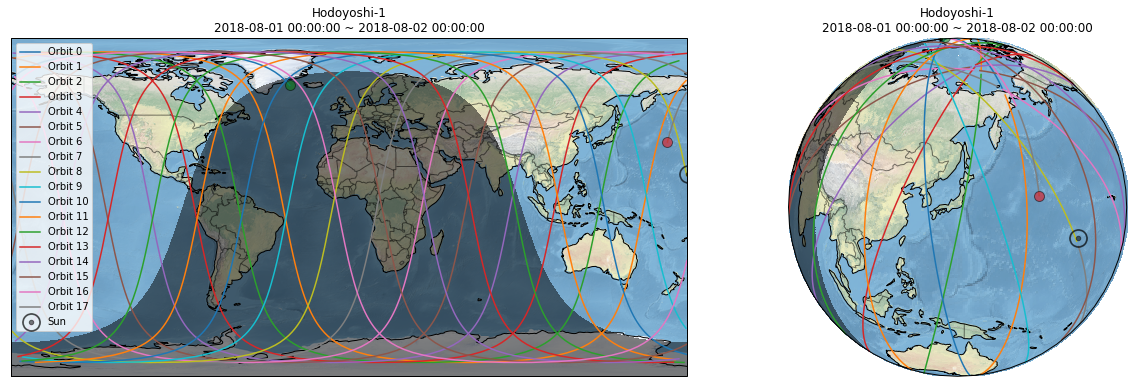

In [4]:
title = "Hodoyoshi-1\n{:} ~ {:}".format(df.index.min(), df.index.max())

fig = plt.figure(figsize=(20,10))

# map projection
projection0 = cartopy.crs.PlateCarree()
projection1 = cartopy.crs.NearsidePerspective(central_longitude=139.0, central_latitude=35.0)

# object transformation
transform = cartopy.crs.PlateCarree()

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

ax0 = plt.subplot(gs[0], projection=projection0)
plot_ground_path(ax0, df, title, transform=transform, daynight=True, legend=True)

ax1 = plt.subplot(gs[1], projection=projection1)
plot_ground_path(ax1, df, title, transform=transform, daynight=True, legend=False)

plt.savefig('ground_path_hodoyoshi.jpg')
plt.show()